# **Intelligent Systems for Bioinformatics**
### Exercise 5: PCA using the "iris.csv" dataset 

**1D PCA**

PC1 is dominated by feature: 'petal_length' (value: 0.86)
Explained variance: [0.92461621]
Reduced dataset shape: (150, 1)


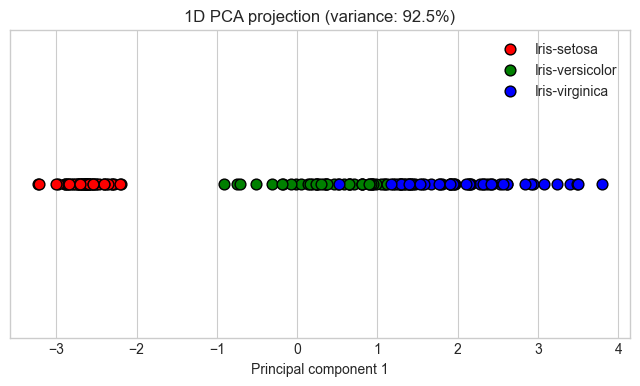

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from si.io.csv_file import read_csv
from si.decomposition.pca import PCA

dataset = read_csv("../datasets/iris/iris.csv", sep=",", features=True, label=True)
classes = np.unique(dataset.y)
colors = ['red', 'green', 'blue']

# 1D PCA
pca_1 = PCA(n_components=1)
pca_1.fit(dataset)

pc1 = pca_1.components[0]
idx_max = np.argmax(np.abs(pc1))
print(f"PC1 is dominated by feature: '{dataset.features[idx_max]}' (value: {pc1[idx_max]:.2f})")

data_1d = pca_1.transform(dataset)

print(f"Explained variance: {pca_1.explained_variance}")
print(f"Reduced dataset shape: {data_1d.shape()}")

# Plot 1D
plt.figure(figsize=(8, 4))
plt.title(f"1D PCA projection (variance: {pca_1.explained_variance[0]*100:.1f}%)")

for i, cls in enumerate(classes):
    mask = (dataset.y == cls)
    plt.scatter(data_1d.X[mask, 0], np.zeros_like(data_1d.X[mask, 0]), 
                label=cls, c=colors[i], edgecolors='k', s=60)

plt.yticks([])
plt.xlabel("Principal component 1")
plt.legend()
plt.show()

**2D PCA**

PC1 is dominated by feature: 'petal_length' (value: 0.86)
PC2 is dominated by feature: 'sepal_width' (value: -0.73)
Explained variance: [0.92461621 0.05301557]
Reduced dataset shape: (150, 2)


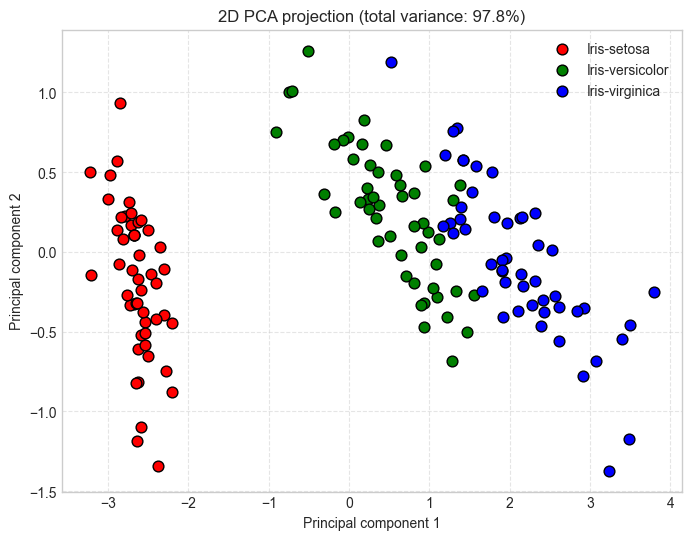

In [19]:
# 2D PCA
pca_2 = PCA(n_components=2)
pca_2.fit(dataset)

for i in range(2):
    component = pca_2.components[i]
    idx_max = np.argmax(np.abs(component))
    print(f"PC{i+1} is dominated by feature: '{dataset.features[idx_max]}' (value: {component[idx_max]:.2f})")

data_2d = pca_2.transform(dataset)

# Plot 2D
plt.figure(figsize=(8, 6))
plt.title(f"2D PCA projection (total variance: {np.sum(pca_2.explained_variance)*100:.1f}%)")

print(f"Explained variance: {pca_2.explained_variance}")
print(f"Reduced dataset shape: {data_2d.shape()}")

for i, cls in enumerate(classes):
    mask = (dataset.y == cls)
    plt.scatter(data_2d.X[mask, 0], data_2d.X[mask, 1], 
                label=cls, c=colors[i], edgecolors='k', s=60)

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**3D PCA**

PC1 is dominated by feature: 'petal_length' (value: 0.86)
PC2 is dominated by feature: 'sepal_width' (value: -0.73)
PC3 is dominated by feature: 'sepal_width' (value: 0.60)
Explained variance: [0.92461621 0.05301557 0.01718514]
Reduced dataset shape: (150, 3)


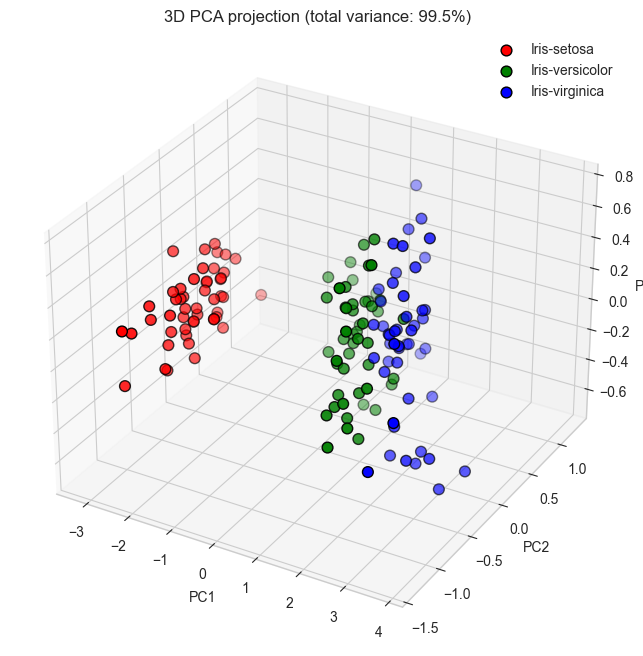

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# 3D PCA
pca_3 = PCA(n_components=3)
pca_3.fit(dataset)

for i in range(3):
    component = pca_3.components[i]
    idx_max = np.argmax(np.abs(component))
    print(f"PC{i+1} is dominated by feature: '{dataset.features[idx_max]}' (value: {component[idx_max]:.2f})")

data_3d = pca_3.transform(dataset)

# Plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"3D PCA projection (total variance: {np.sum(pca_3.explained_variance)*100:.1f}%)")

print(f"Explained variance: {pca_3.explained_variance}")
print(f"Reduced dataset shape: {data_3d.shape()}")

for i, cls in enumerate(classes):
    mask = (dataset.y == cls)
    ax.scatter(data_3d.X[mask, 0], data_3d.X[mask, 1], data_3d.X[mask, 2], 
               label=cls, c=colors[i], edgecolors='k', s=60)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()